<a href="https://colab.research.google.com/github/Maxxx-VS/The-Founder/blob/master/%D0%A0%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D1%81_%D0%BB%D0%B8%D1%86%D0%BE%D0%BC_%2B_cv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Найдите фото любого известного актера или актрисы.
2.  Распознайте лицо на фотографии. Выделите лицо овалом. Какой метод для рисования овала использовать, вы должны найти самостоятельно.
3. Выделите на изображении глаза. Выделите их кружком. Если вы чувствуете в себе суперсилу и дополнительный бекграунд знаний, и хотите получить больше баллов за задание, то нарисуйте вместо кружков солнцезащитные очки (картинку очков можно найти в интернете, задача их правильно масштабировать и разместить).
4. Все лицо кроме глаз необходимо "заблюрить" (размыть) с помощью функции blur_face (функция объявлена ниже).
Оценка за задание:

1 балл - задача решена с помощью куратора, лицо распознано прямоугольником, глаза кругом.

2 балла - задача решена с незначительными подсказками куратора, лицо распознано прямоугольником или кругом, глаза кругом, лицо размыто.

3 балла - задача решена самостоятельно, лицо распознано овалом, глаза кругом, удалось заблюрить лицо, не затронув глаза.

4 балла - задача решена самостоятельно на 3 балла, удалось нарисовать очки с подсказкой куратора, недостаточна соблюдена симметрия расположения очков или недостаточно учтены их размеры.

5 баллов - задача полностью решена самостоятельно, все пункты выполнены.

In [354]:
!pip install opencv-python

In [355]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [356]:
img = cv2.imread('/content/grayscale-woman-headshot-serene-face-expression-portrait_53876-14465.jpg')
eye = cv2.CascadeClassifier(cv2.data.haarcascades+ "haarcascade_eye.xml")
glasses = cv2.imread('/content/vector-realistic-glasses-illustration_147323-259.jpg')

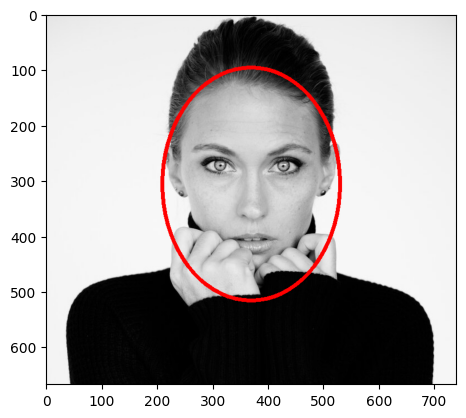

In [357]:
# ищем лицо
fig, ax = plt.subplots()
face = cv2.CascadeClassifier(cv2.data.haarcascades+ "haarcascade_frontalface_default.xml")
face_1 = face.detectMultiScale(img,
                               scaleFactor=2,
                               minNeighbors=3,
                               minSize=(10, 10))[0]

bboxes = face.detectMultiScale(img)
x, y, widht, height = face_1
face = img[y:y+height, x:x+widht]
# Работа с лицом
for box in bboxes:
    # Координаты овала
    x, y, width, height = box
    x2, y2 = x + width, y + height
    z1, z2 = (x2+x)/2, (y2+y)/2
    cv2.ellipse(img,(int(z1), int(z2)),(160, 210),0,0,360,(0, 0, 255), 5)



ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

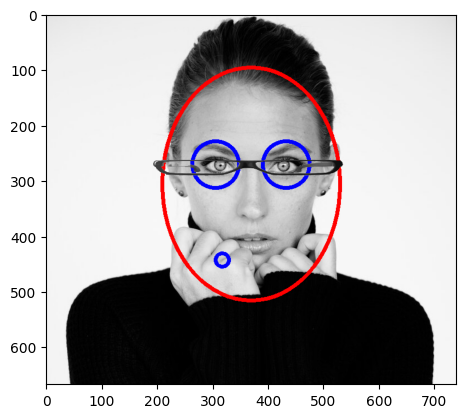

In [358]:
# работа с глазами
eyes = eye.detectMultiScale(face)

for (x_eye,y_eye,w_eye,h_eye) in eyes:
    # координаты кругов
    center = (int(x_eye + 0.5*w_eye), int(y_eye + 0.5*h_eye))
    radius = int(0.3 * (w_eye + h_eye))
    cv2.circle(face, center, radius, (255, 0, 0), 5)

# надеваем очки
face_with_eyes_only = face[eyes_loc[0][1]:eyes_loc[0][1]+int(eyes_loc[0][3]*100/eyes_loc[0][2]), :]
glasses = cv2.resize(glasses, (face_with_eyes_only.shape[1], face_with_eyes_only.shape[0]), interpolation=cv2.INTER_AREA)
gray_mask = cv2.cvtColor(glasses, cv2.COLOR_BGR2GRAY)
ii, mask = cv2.threshold(gray_mask, 140, 255, cv2.THRESH_BINARY_INV)
mask_inv = cv2.bitwise_not(mask)

masked_glasses = cv2.bitwise_and(glasses, glasses, mask=mask)
image_center = tuple(np.array(masked_glasses.shape[1::-1]) / 2)
rot_mat = cv2.getRotationMatrix2D(image_center,  (eyes_loc[1][1]-eyes_loc[0][1])/(eyes_loc[1][0]-eyes_loc[0][0]), 1.0)
result = cv2.warpAffine(masked_glasses, rot_mat, masked_glasses.shape[1::-1], flags=cv2.INTER_LINEAR)
masked_face = cv2.bitwise_and(face_with_eyes_only, face_with_eyes_only, mask=mask_inv)
face_with_eyes_only[:] = cv2.add(masked_face, masked_glasses)
fig, ax = plt.subplots()

ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

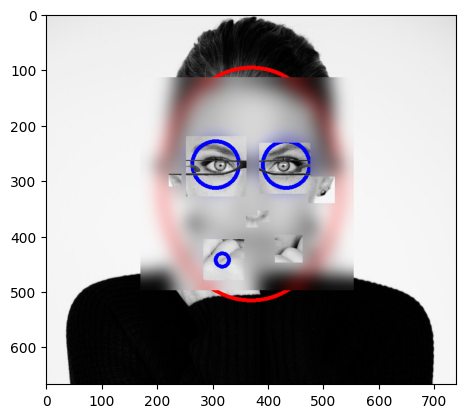

In [359]:
# блюрим лицо
def her_face_blur(img):
    (height, widht) = img.shape[:2]
    half_widht = int(widht // 4)
    half_height = int(height // 4)
    if half_widht % 2 == 0:
          half_widht -= 1
    if half_height % 2 == 0:
          half_height -= 1

    return cv2.GaussianBlur(img, (half_widht, half_height), 0)


face_copy = np.copy(face)
face[:] = her_face_blur(face)
fig, ax = plt.subplots()

for x_eye, y_eye, w_eye, h_eye in eyes_pos:
    face[y_eye:y_eye+h_eye, x_eye:x_eye+w_eye] = face_copy[y_eye:y_eye+h_eye, x_eye:x_eye+w_eye]

ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))